In [134]:
pip install nltk

In [135]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [136]:
import pandas as pd
from nltk.stem import *
from nltk.corpus import stopwords
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from nltk.tokenize import WhitespaceTokenizer
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
import time
import sklearn
import warnings
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef, cohen_kappa_score,make_scorer
import pickle

In [137]:
df = pd.read_excel('iphproductdata.xlsx')
df.head()

,Country Code,IPH Category,IPH Sub Category,Product,Product Description,Product Code,Gross Sales USD
0,AT,Personal Care,Family Planning,Billy Boy Aromatisiert 1St,OL: Billy Boy Aromatisiert > 1St,100838,0
1,BG,Personal Care,Family Planning,ВИП ПАУЪР ШОК АФРОДИЗИАК 20Г,VIP POWER SHOCK APHRODISIAC 20G,6968,0
2,BG,Personal Care,Family Planning,ДУРЕКС ФИЙЛ ТИН ПРЕЗЕРВАТИВИ 3БР,DUREX FIEL TIN CONDOMS 3BR,17202,0
3,CA,Personal Care,Family Planning,FIRST RESPONSE PREGNANCY TEST 1 Ea,FIRST RESPONSE PREGNANCY TEST 1 Ea,061700900267,0
4,CA,Personal Care,Family Planning,Lifestyle Nuda Ultra Sensitive 1 Ea,Lifestyle Nuda Ultra Sensitive 1 Ea,070907017036,0


In [138]:
df.isna().sum()

Country Code           0
IPH Category           0
IPH Sub Category       0
Product                0
Product Description    0
Product Code           0
Gross Sales USD        0
dtype: int64

In [139]:
df = df.drop(index=df[df.duplicated(['Product Description'])].index) 

In [140]:
df['Final_Category'] = df['IPH Category'].str.cat(df[['IPH Sub Category']].values,sep=' - ')

In [141]:
df['Final_Category'].head()

0    Personal Care - Family Planning
1    Personal Care - Family Planning
2    Personal Care - Family Planning
3    Personal Care - Family Planning
4    Personal Care - Family Planning
Name: Final_Category, dtype: object

In [142]:
df['Final_Category'].nunique()

20

In [143]:
final_categories_counts = df['Final_Category'].value_counts().sort_values(ascending=True)

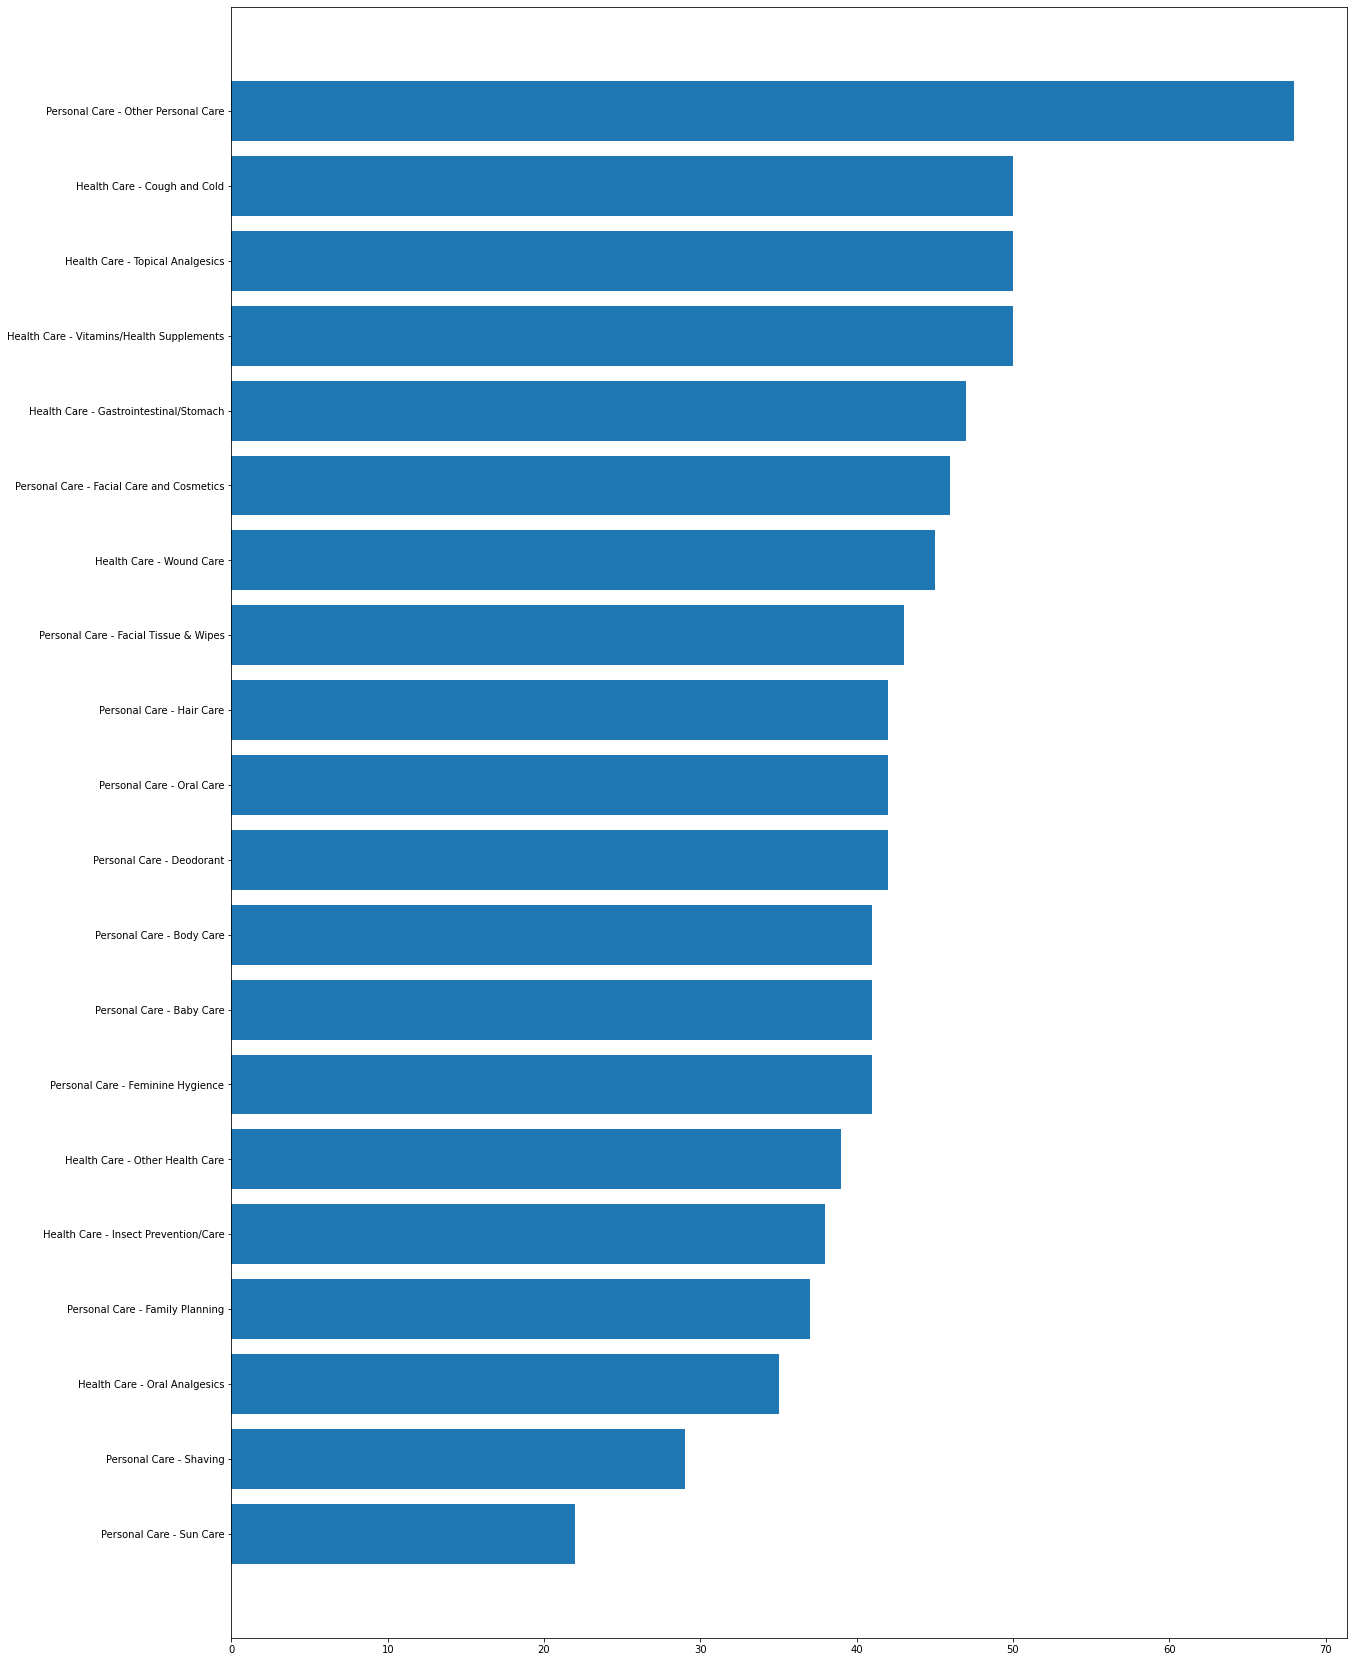

In [144]:
plt.figure(figsize=(20,30))
plt.barh(final_categories_counts.index, final_categories_counts)
plt.xlabel=None

In [145]:
final_categories_counts.head(30)

Personal Care - Sun Care                     22
Personal Care - Shaving                      29
Health Care - Oral Analgesics                35
Personal Care - Family Planning              37
Health Care - Insect Prevention/Care         38
Health Care - Other Health Care              39
Personal Care - Feminine Hygience            41
Personal Care - Baby Care                    41
Personal Care - Body Care                    41
Personal Care - Deodorant                    42
Personal Care - Oral Care                    42
Personal Care - Hair Care                    42
Personal Care - Facial Tissue & Wipes        43
Health Care - Wound Care                     45
Personal Care - Facial Care and Cosmetics    46
Health Care - Gastrointestinal/Stomach       47
Health Care - Vitamins/Health Supplements    50
Health Care - Topical Analgesics             50
Health Care - Cough and Cold                 50
Personal Care - Other Personal Care          68
Name: Final_Category, dtype: int64

In [146]:
small_count_categories = final_categories_counts[final_categories_counts<=5].index

In [147]:
len(small_count_categories)

0

In [148]:
df['Final_Category'].replace(to_replace=small_count_categories, value='Other', inplace=True)

In [149]:
df['codes'] = df['Final_Category'].astype('category').cat.codes
df['codes'].nunique()

20

In [150]:
code_dictionary = dict(set(list(zip(df['codes'], df['Final_Category']))))

In [151]:
X = df['Product Description']
y = df['codes']

In [152]:
tokenizer = WhitespaceTokenizer()

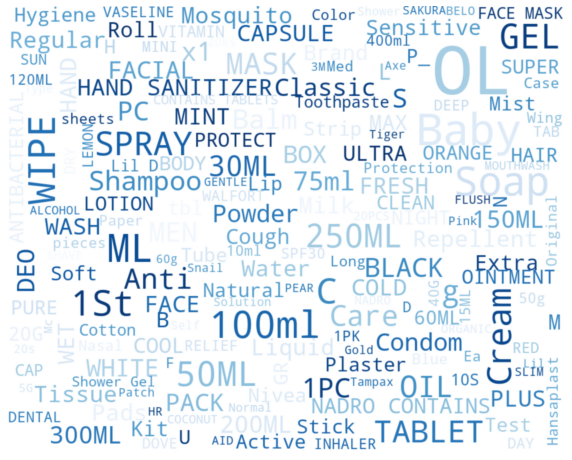

In [153]:
from wordcloud import WordCloud
word_cloud = WordCloud(width = 1000,
                       height = 800,
                       colormap = 'Blues', 
                       margin = 0,
                       max_words = 183,  
                       max_font_size = 120, min_font_size = 15,  
                       background_color = "white").generate(" ".join(X_train))

plt.figure(figsize = (10, 15))
plt.imshow(word_cloud, interpolation = "gaussian")
plt.axis("off")
plt.show()

In [154]:
def plot_most_common_features(text_col, target_col, n_features=50):
    from matplotlib import interactive

    df = pd.DataFrame({"text": text_col, "CLASS": target_col})
    grouped = df.groupby(["CLASS"]).apply(lambda x: x["text"].sum())
    grouped_df = pd.DataFrame({"CLASS": grouped.index, "text": grouped.values})

    from nltk.tokenize import WhitespaceTokenizer
    tokenizer = WhitespaceTokenizer()

    for ii, text in enumerate(grouped_df.text):
        pd.DataFrame(tokenizer.tokenize(text)).apply(pd.value_counts).head(n_features).plot(kind="bar", cmap=plt.cm.seismic, figsize=(20,5))
        plt.title(grouped_df.CLASS[ii], fontsize=20)
        plt.xticks(fontsize=15)
        plt.legend([])
        interactive(True)
        plt.show()

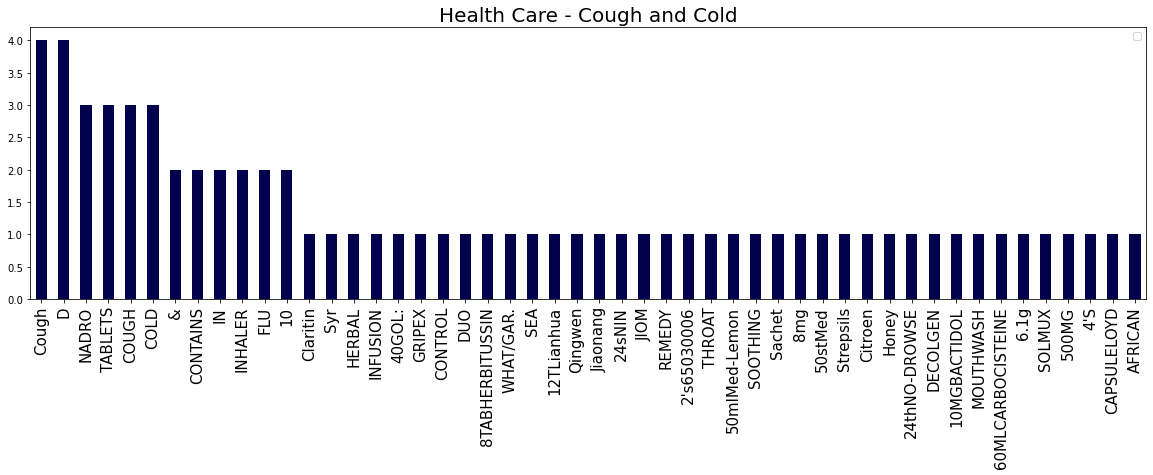

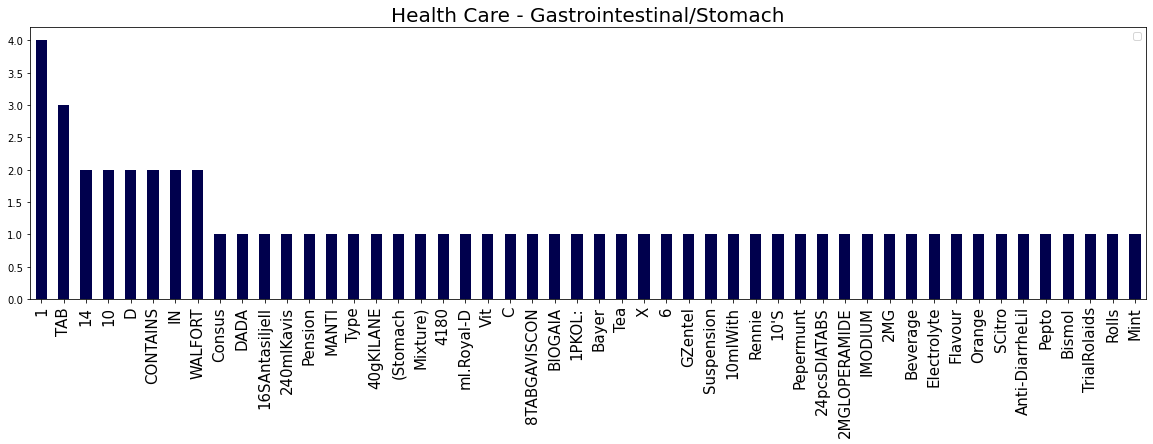

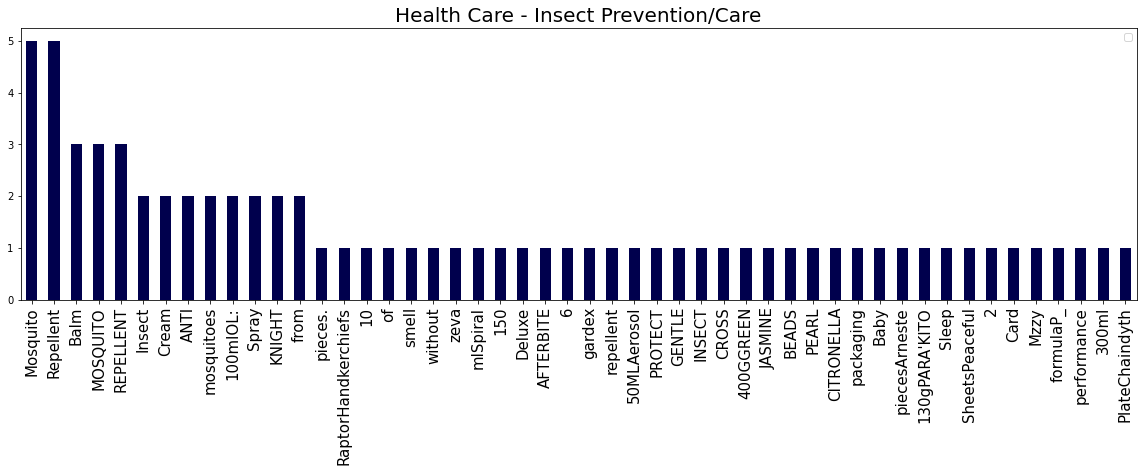

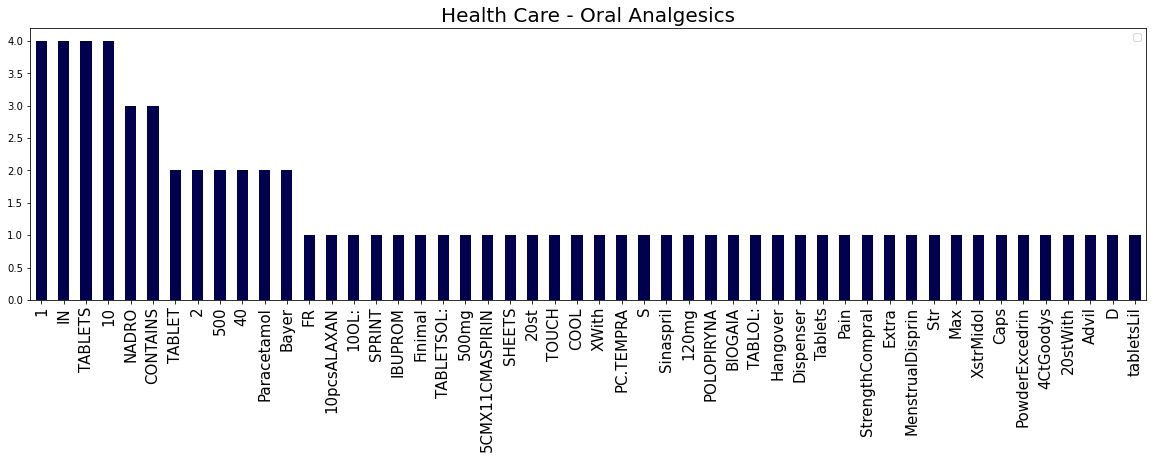

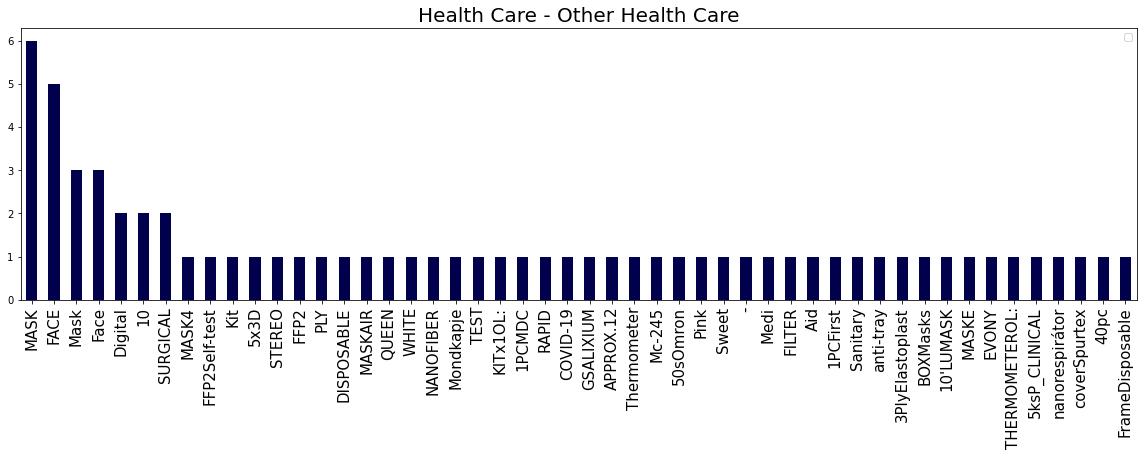

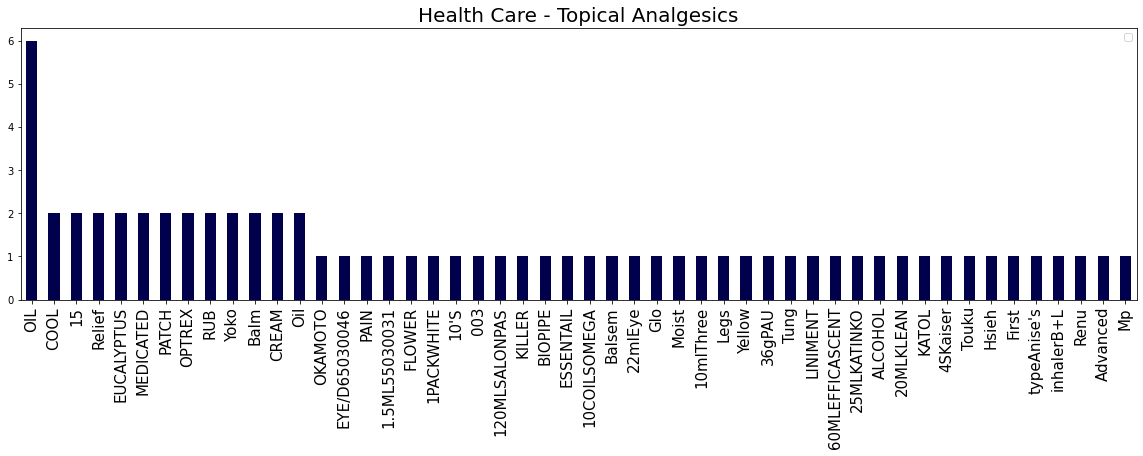

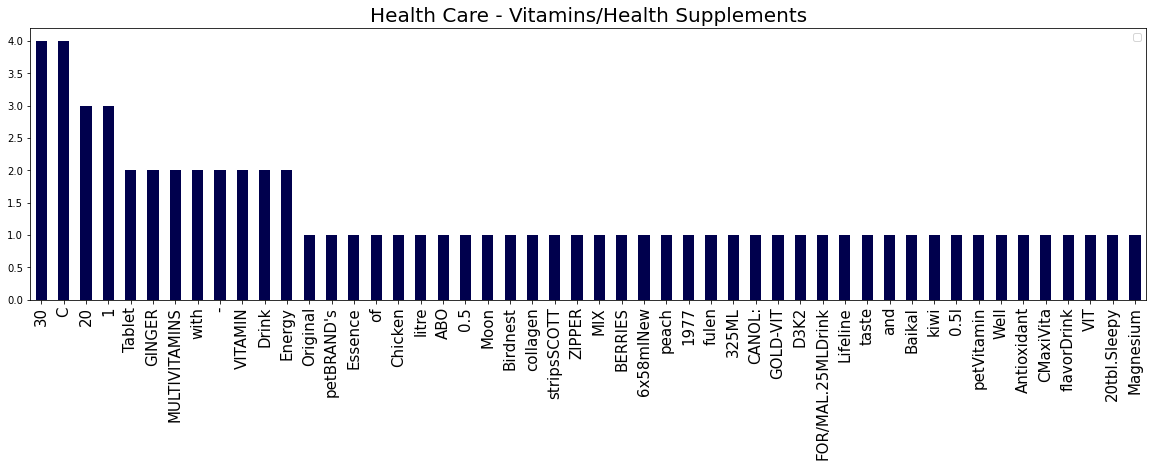

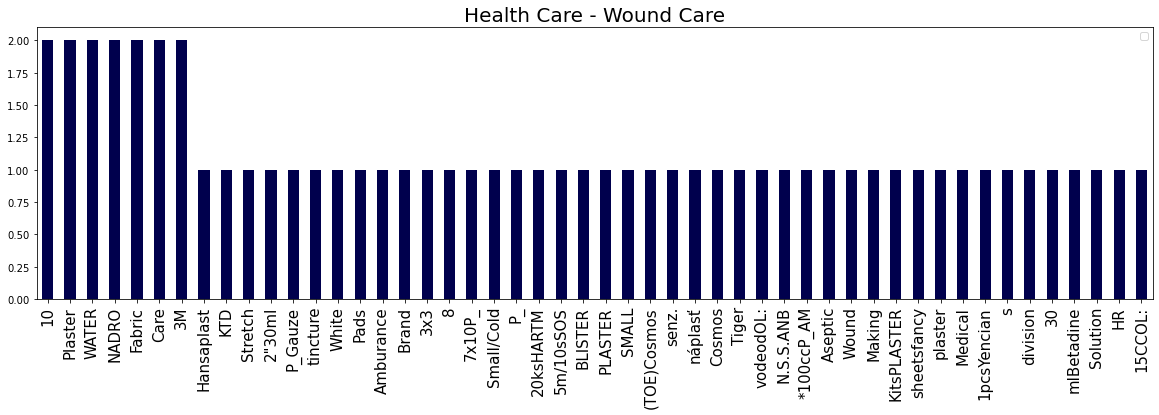

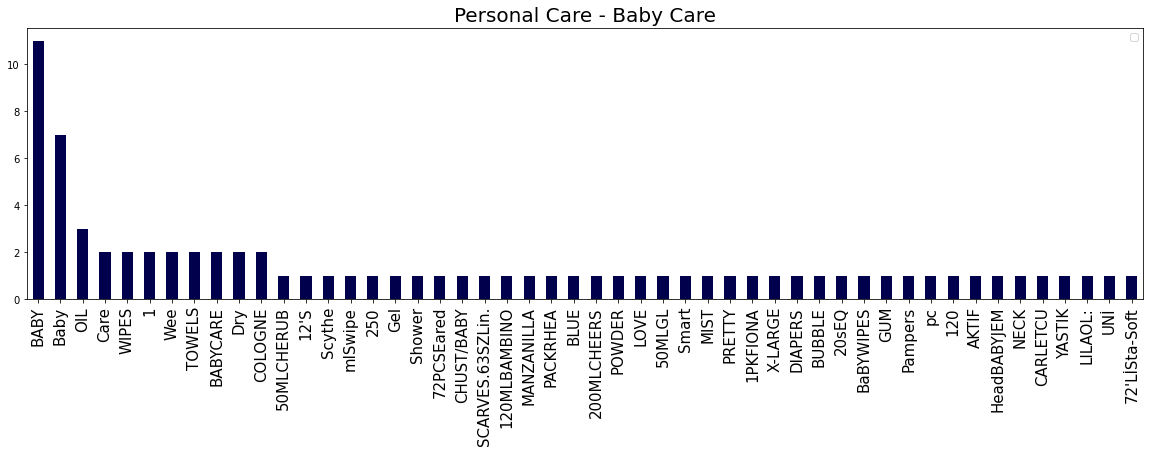

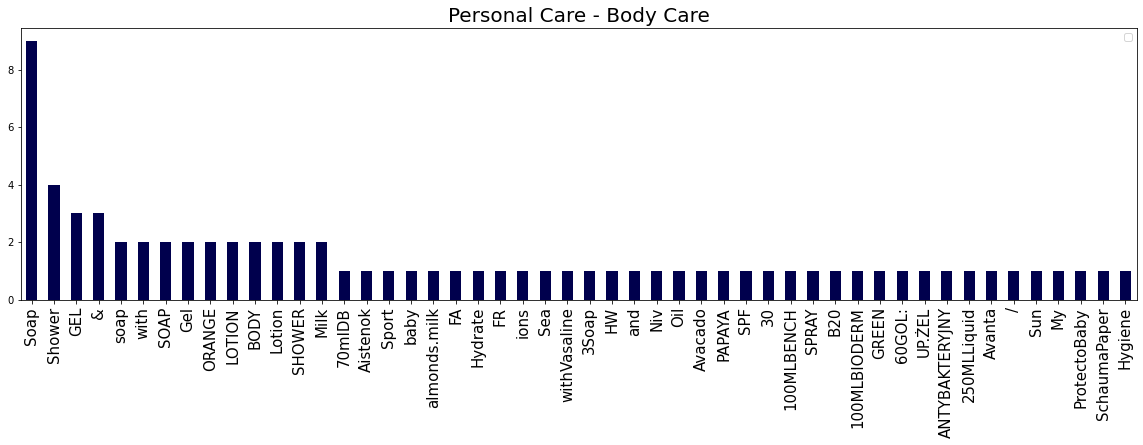

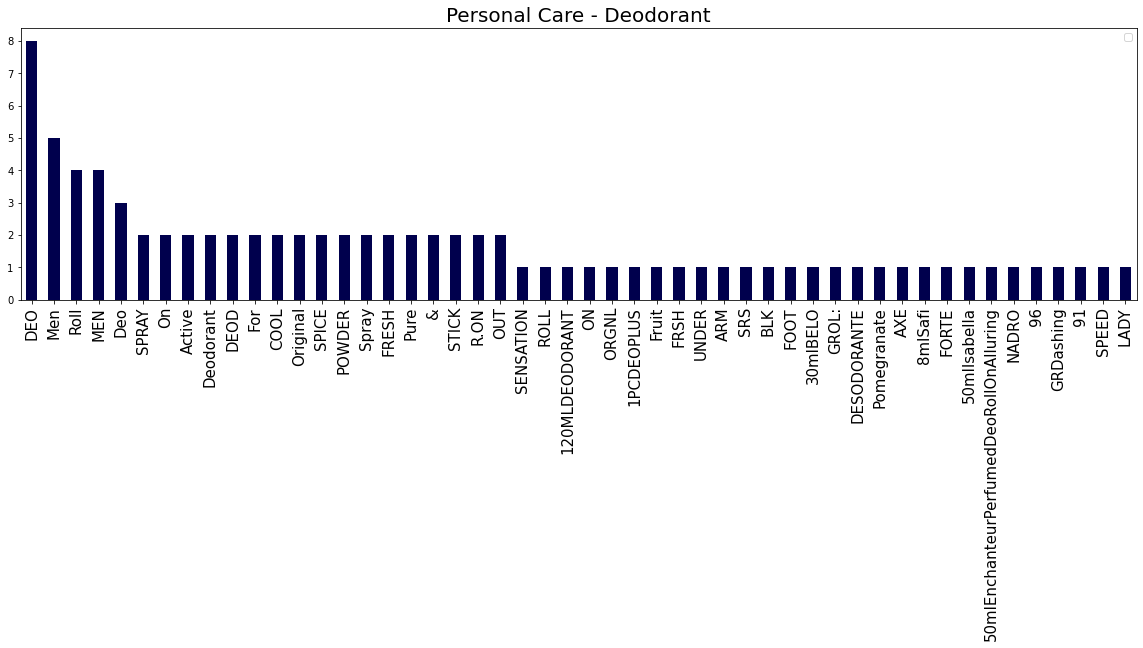

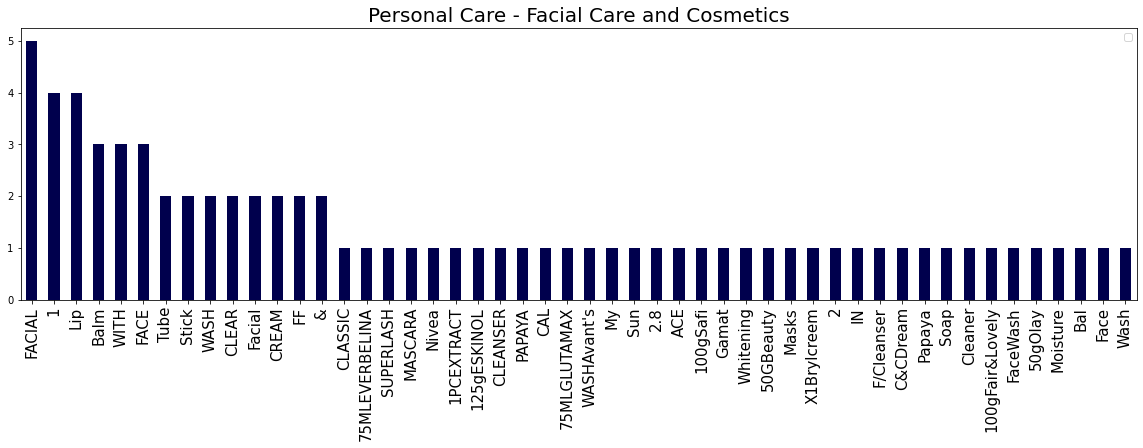

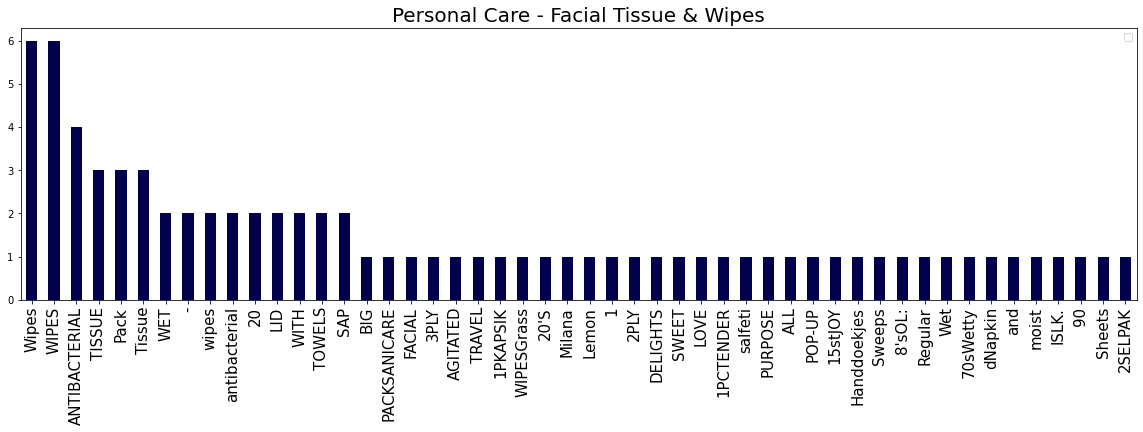

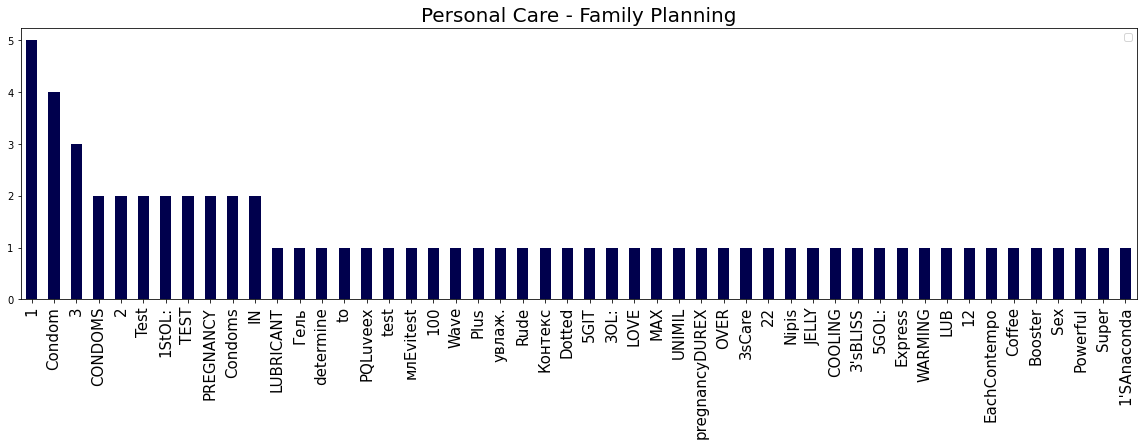

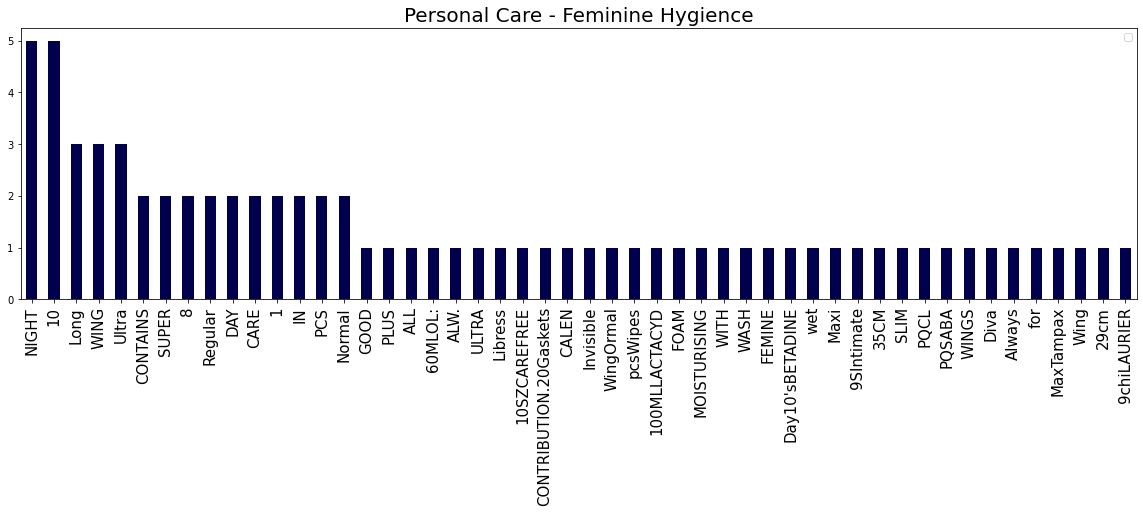

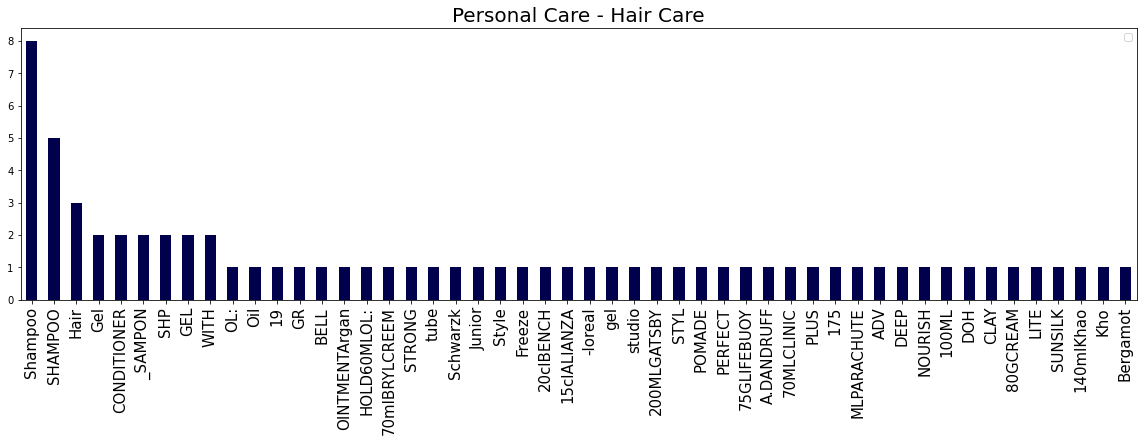

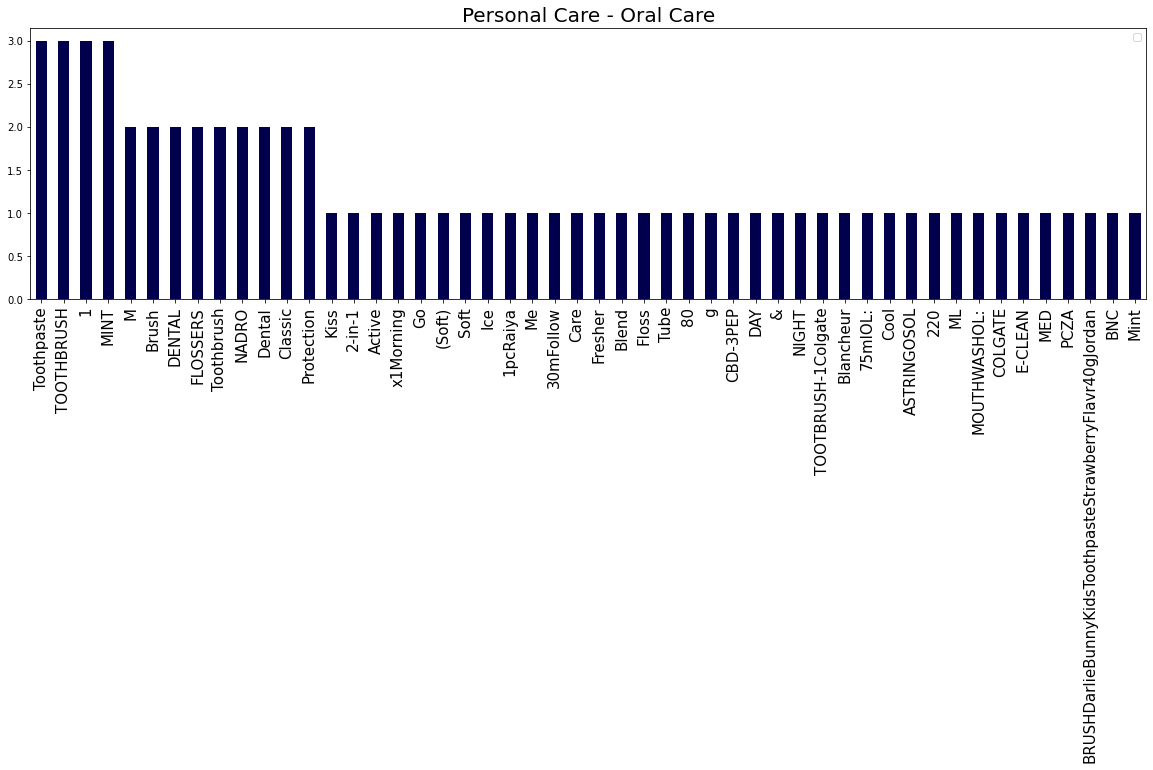

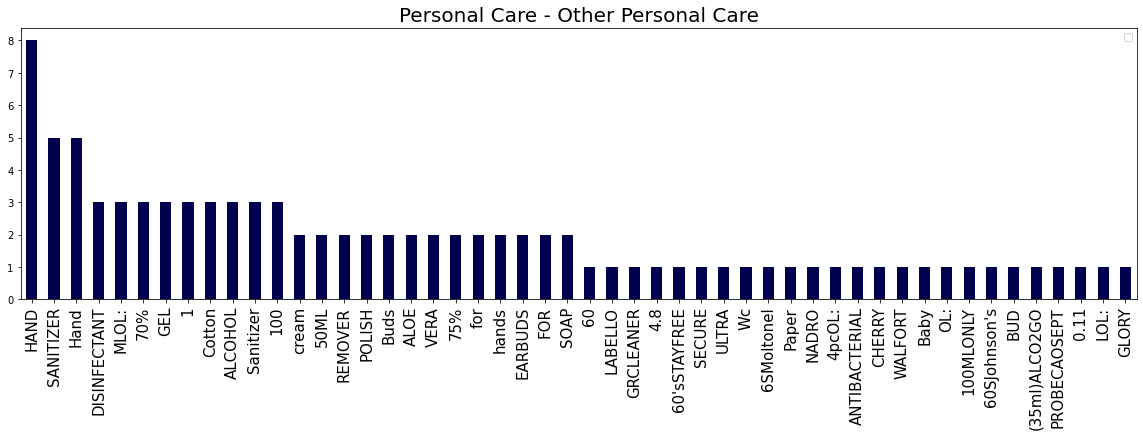

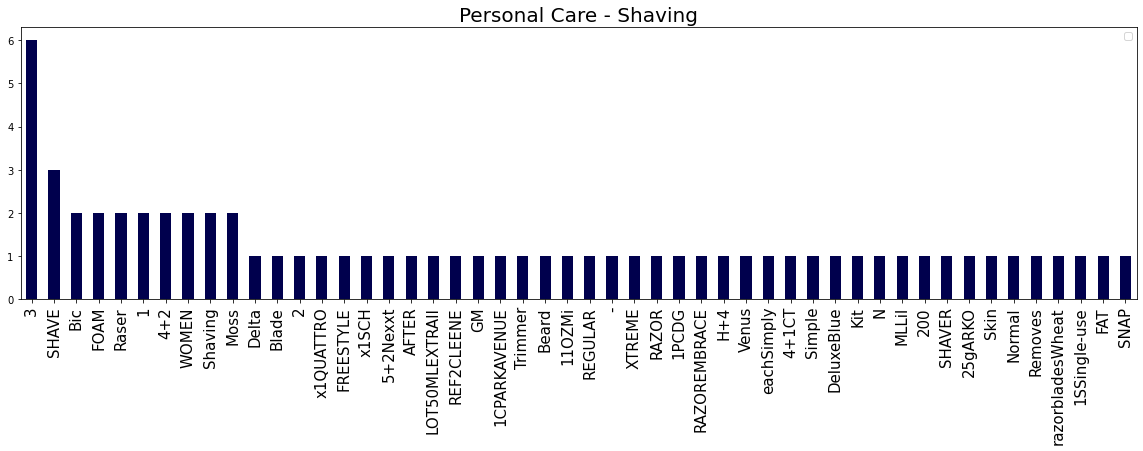

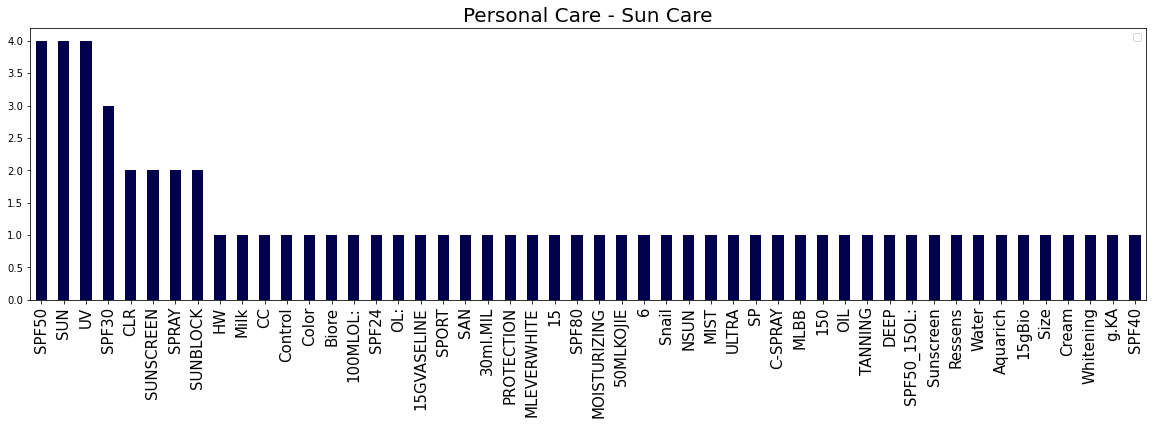

In [155]:
plot_most_common_features(X,df['Final_Category'])

In [156]:
nltk.download('stopwords')

from nltk.stem import SnowballStemmer


def process_text(raw_text):

    letters_only = re.sub("[^a-zA-Z]", " ",raw_text)
    no_one_letter = re.sub(r"\b[a-zA-Z]\b","",letters_only)
    words = no_one_letter.lower().split()
    
    stops = set(stopwords.words("spanish")) 
    not_stop_words = [w for w in words if not w in stops]

    final_words = [word for word in not_stop_words]
    
    return( " ".join( final_words ))  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\S.Subramanian2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [157]:
nltk.download('stopwords')

from nltk.stem import SnowballStemmer


def stemming(raw_text):
    
    stemmer = SnowballStemmer('spanish')
    stemmed = [stemmer.stem(word) for word in raw_text]
    
    return("".join(stemmed))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\S.Subramanian2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [158]:
X_cleaner = X.apply(lambda x: process_text(x))

In [159]:
X_cleaner_2 = X_cleaner.apply(lambda x: stemming(x))

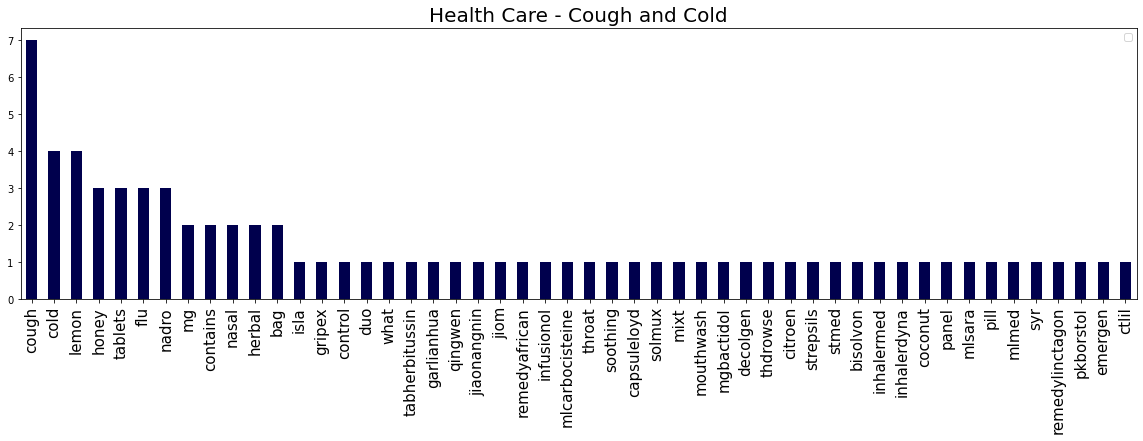

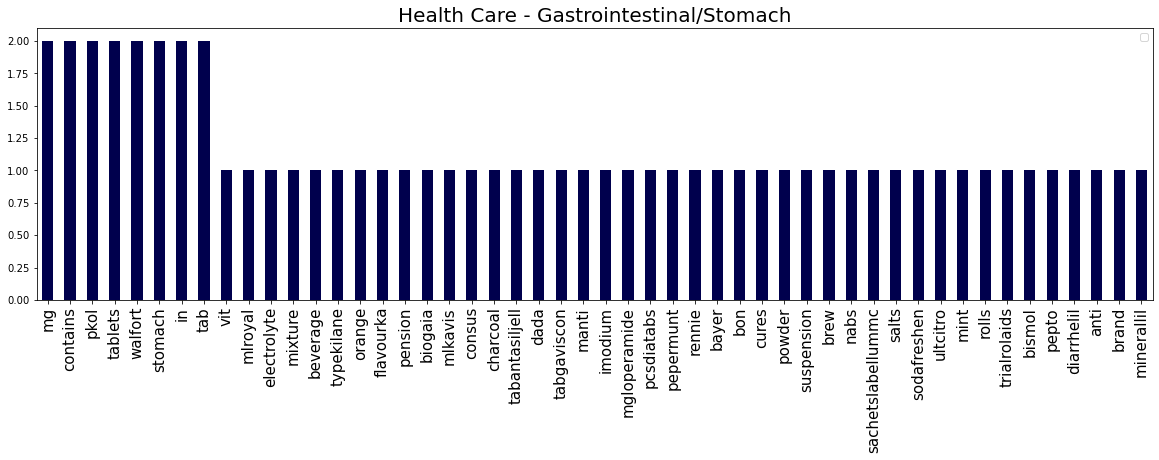

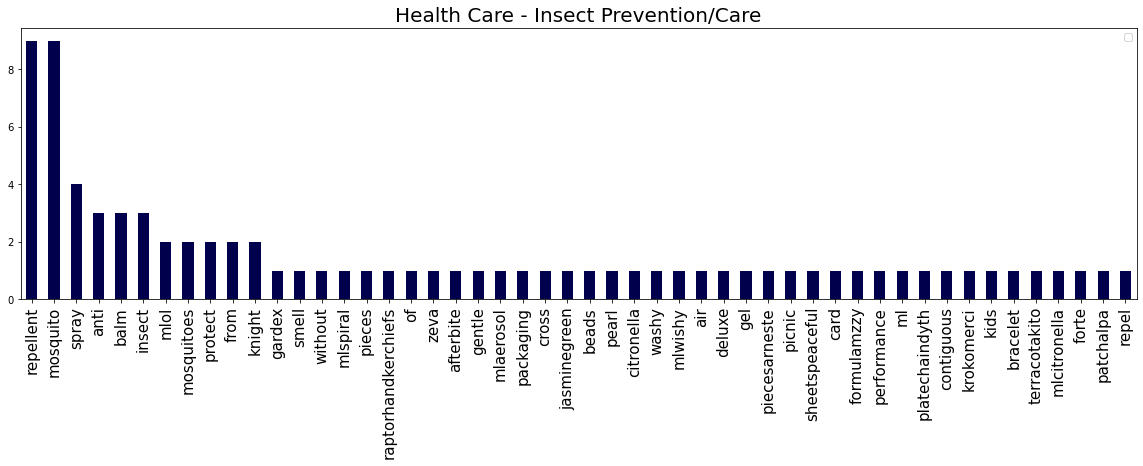

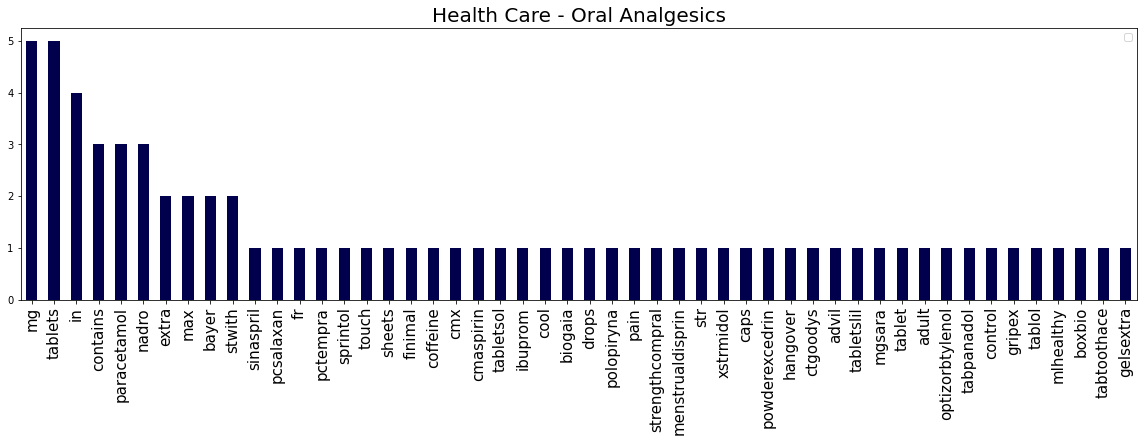

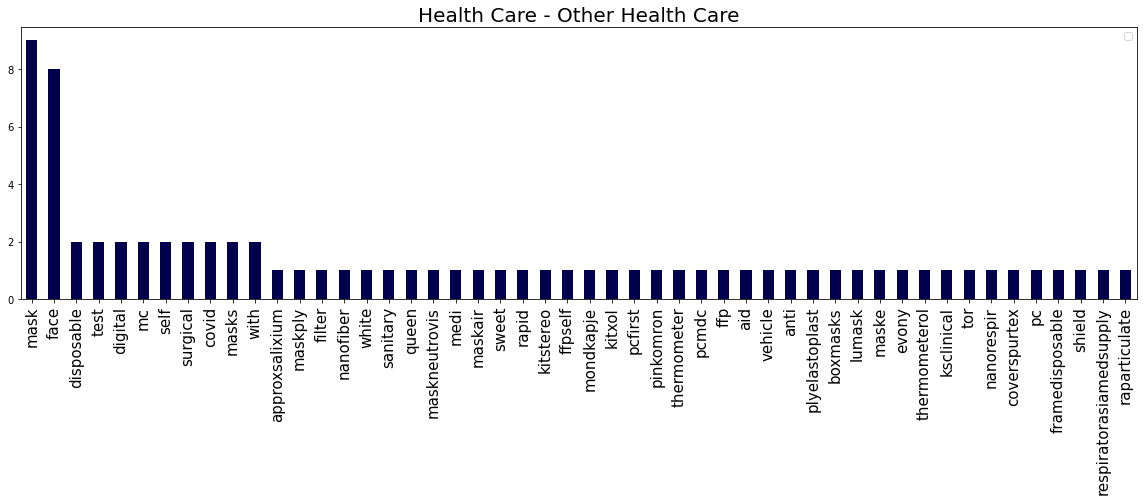

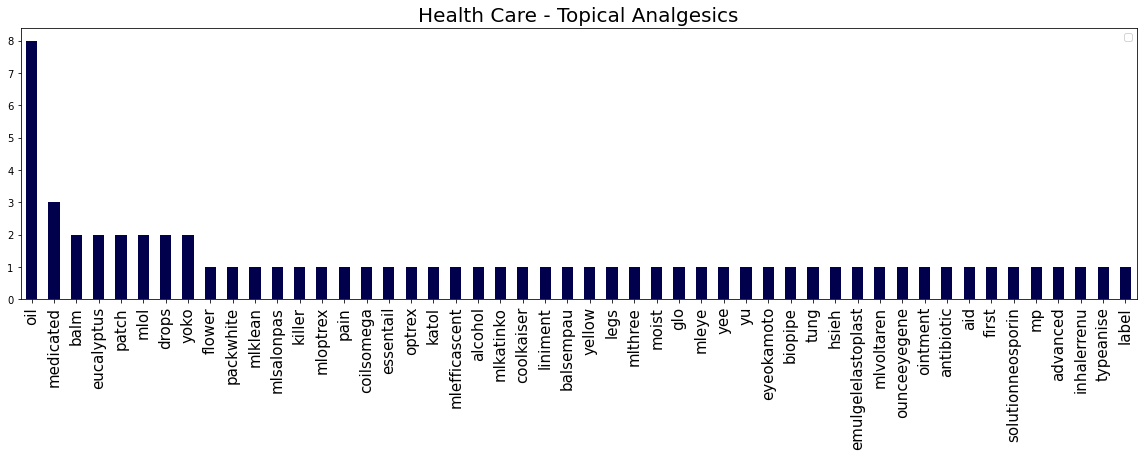

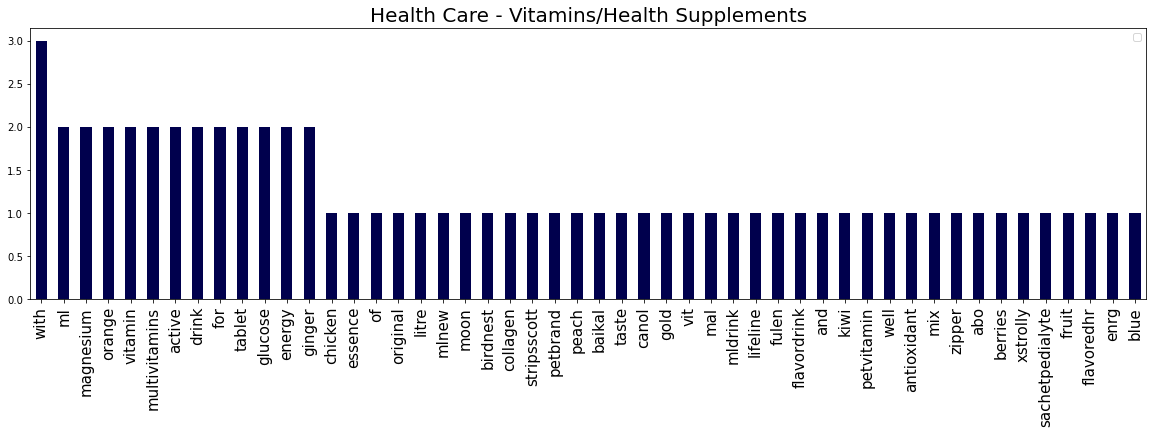

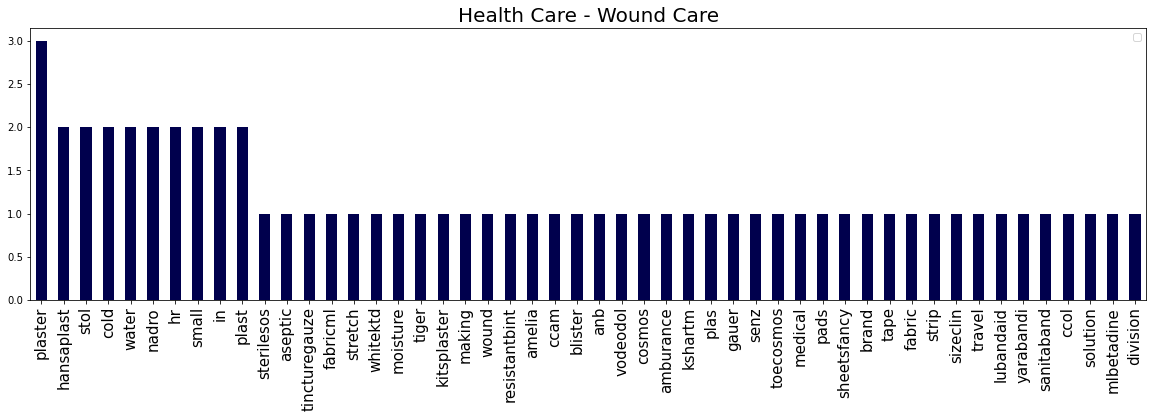

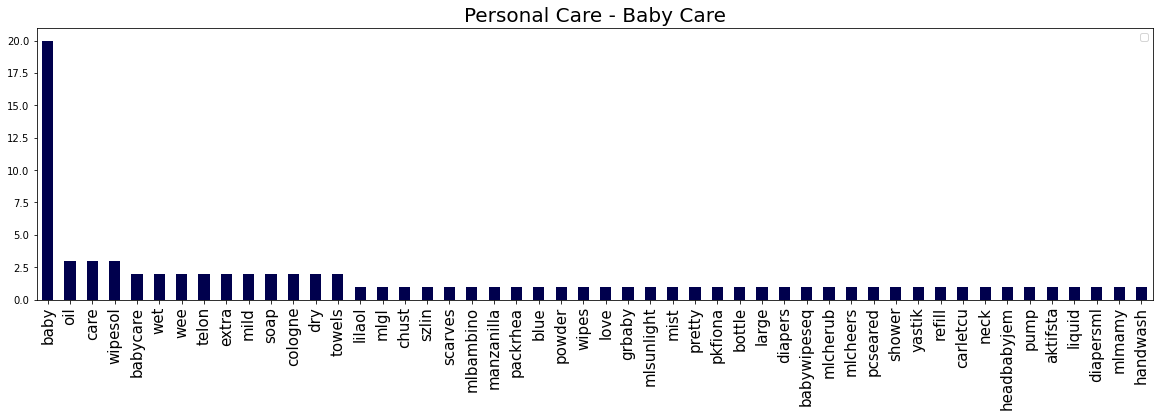

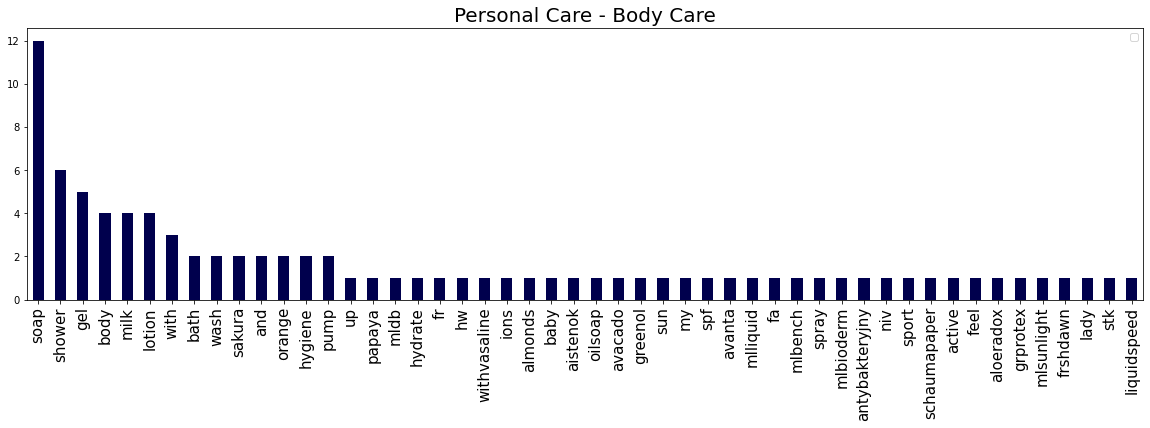

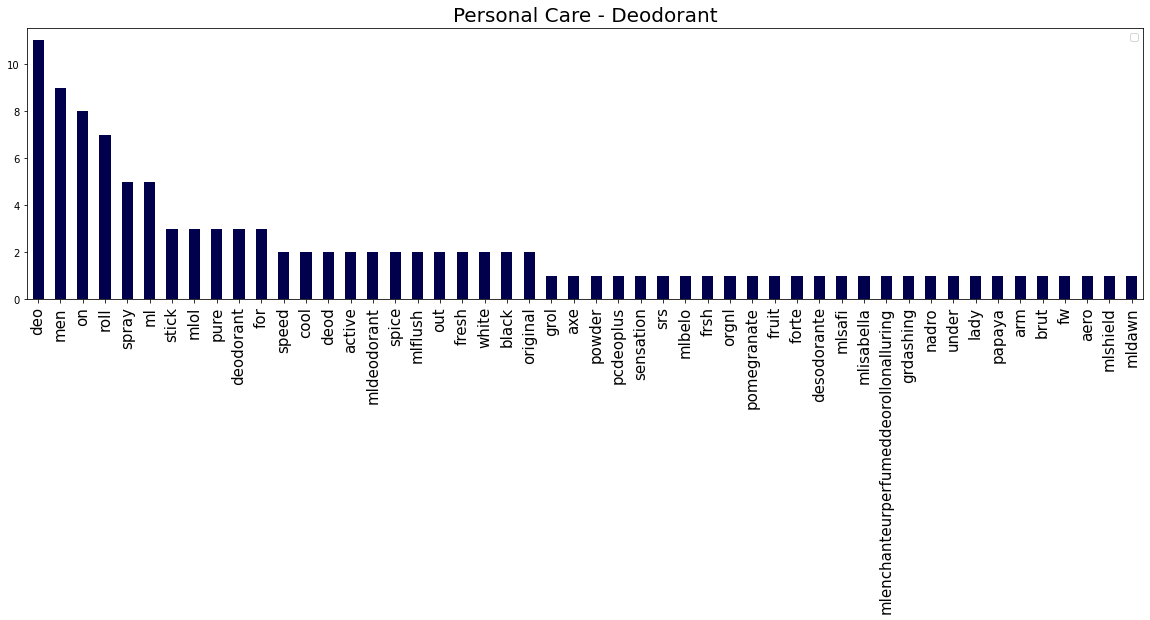

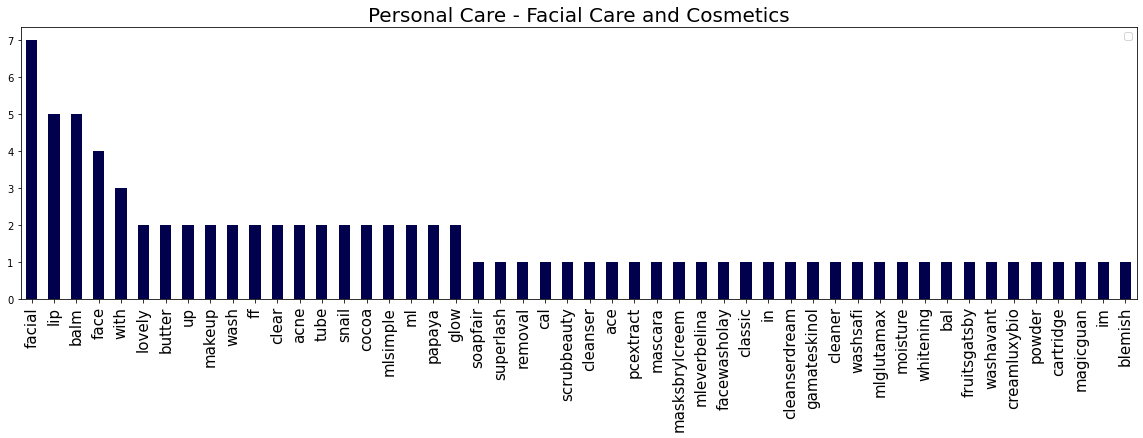

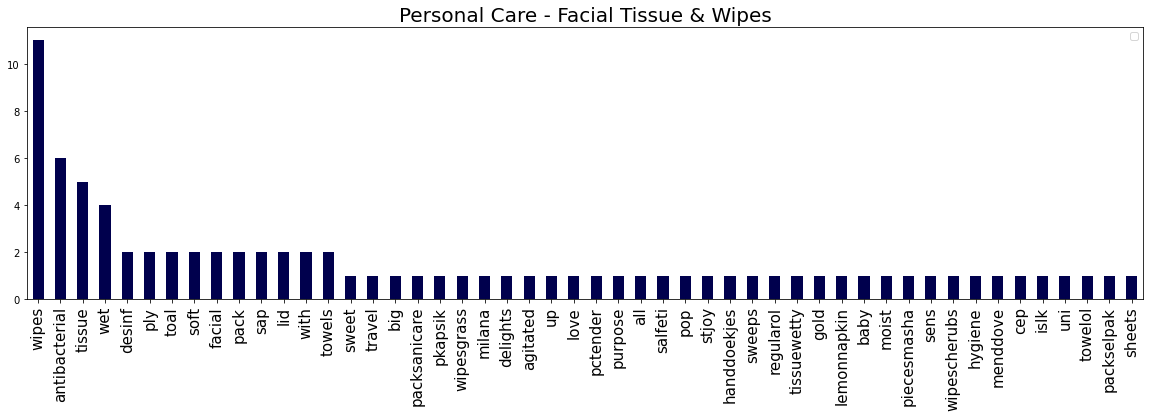

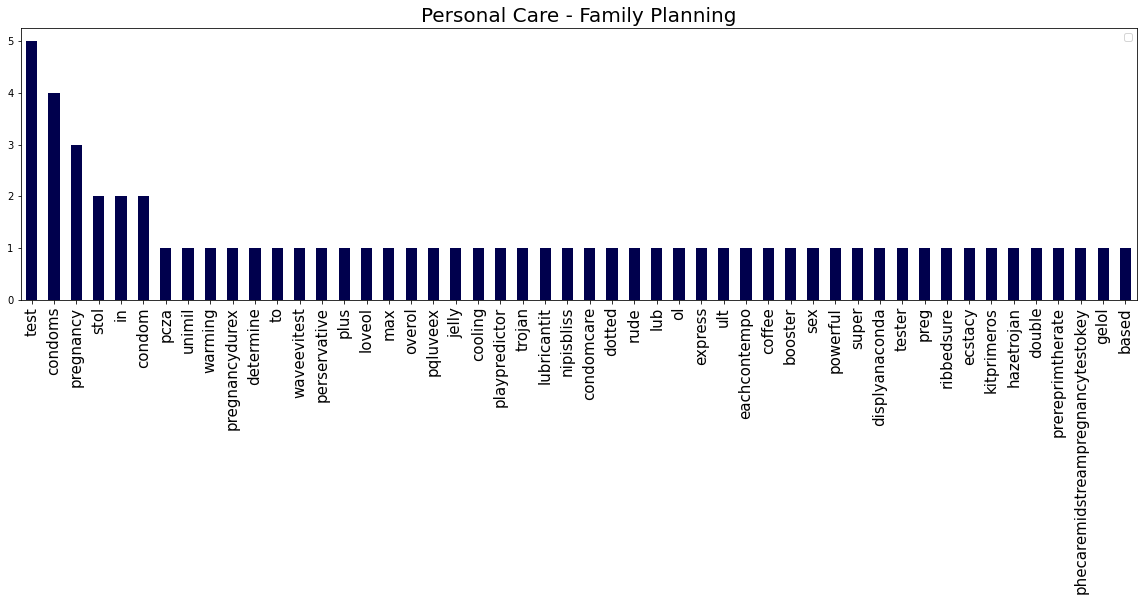

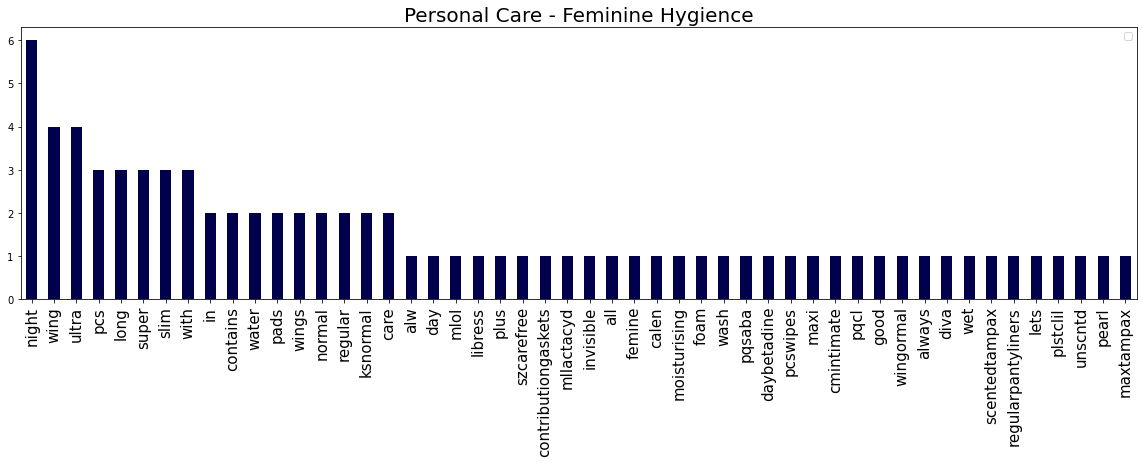

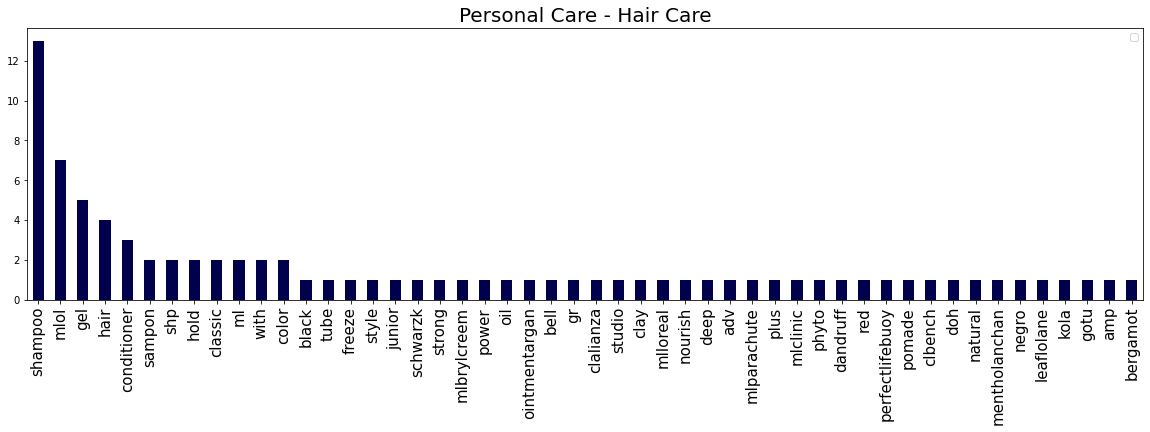

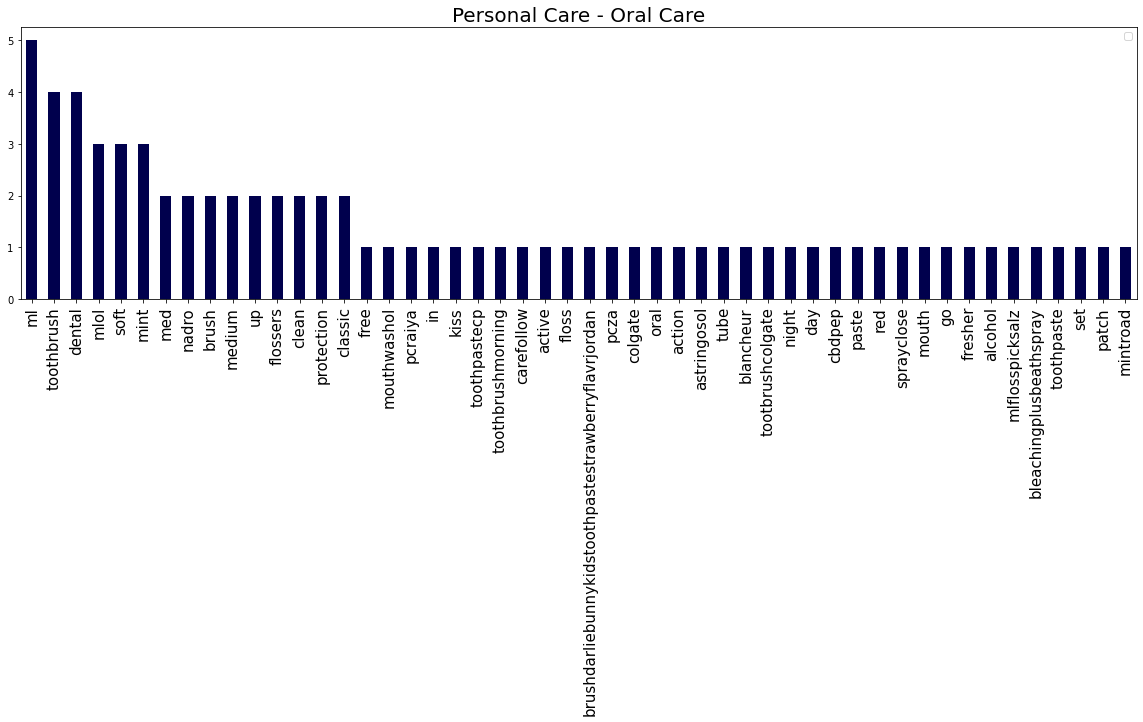

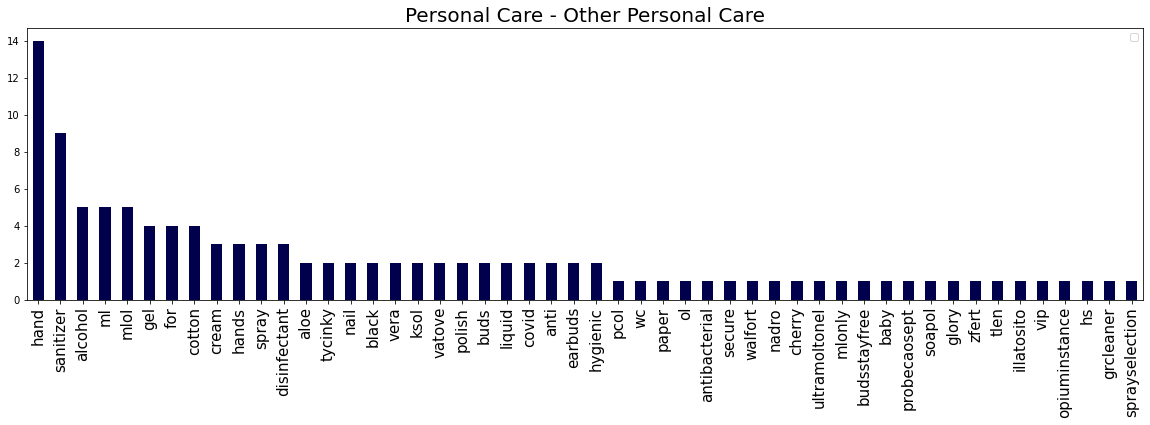

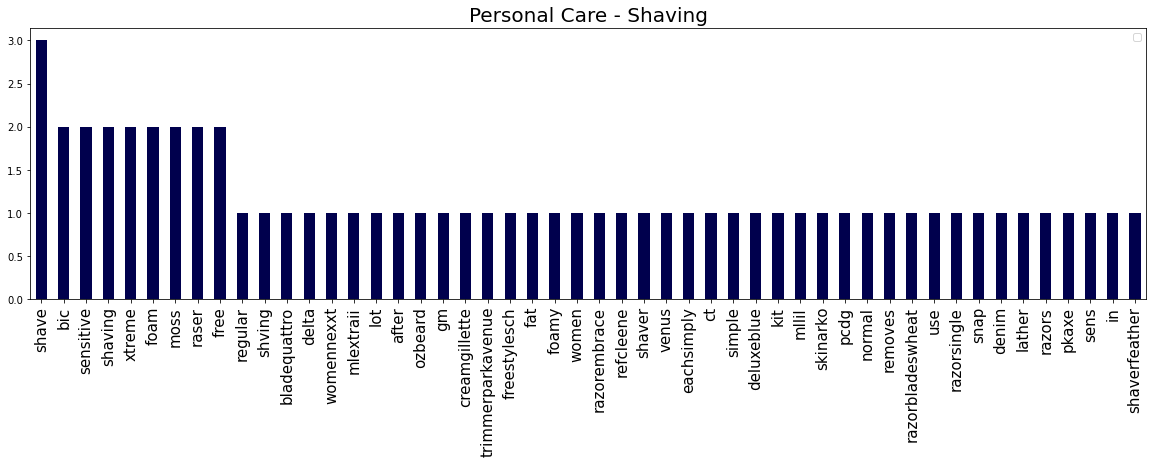

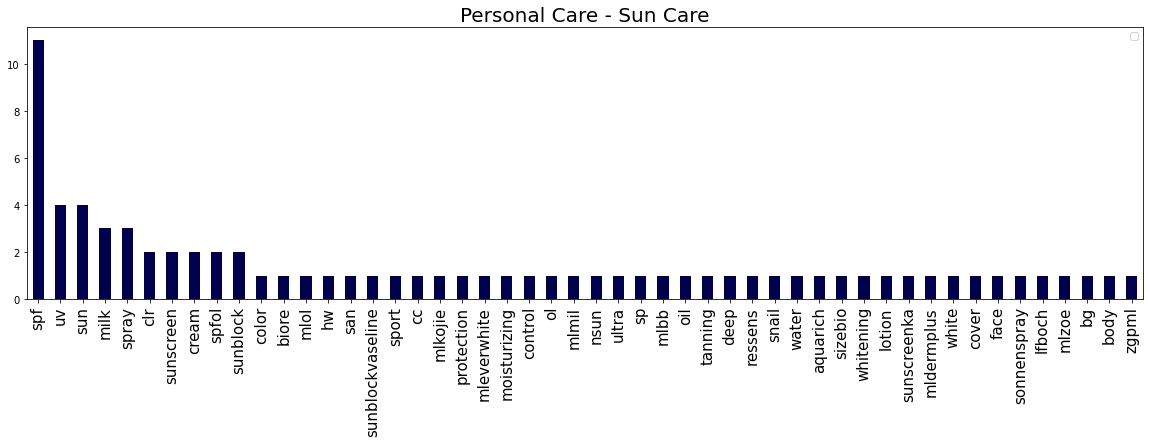

In [160]:
plot_most_common_features(X_cleaner_2,df['Final_Category'])

In [161]:
warnings.filterwarnings('ignore') # Do not print warning messages

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [163]:
def text_p(X):
    return X.apply(lambda x: process_text(x))  

In [164]:
def stemming_func(X):
    return X.apply(lambda x: stemming(x))

In [165]:
count_vect = CountVectorizer(analyzer = "word")
tfidf = TfidfTransformer(norm="l2")

In [166]:
text_process = FunctionTransformer(text_p)
stemming_text = FunctionTransformer(stemming_func)

In [167]:
naive_multi = MultinomialNB()
svc = SVC()
rf = RandomForestClassifier(n_jobs=-1)
lr = LogisticRegression(multi_class='ovr')

In [168]:
pipeline = Pipeline([
    ('process', text_process),
    ('stemmer', stemming_text),
    ('count_vector', count_vect),
    ('tfidf', tfidf),
    ('model', naive_multi)
])
pipeline

Pipeline(steps=[('process',
                 FunctionTransformer(func=<function text_p at 0x000001B837C57F70>)),
                ('stemmer',
                 FunctionTransformer(func=<function stemming_func at 0x000001B837C57DC0>)),
                ('count_vector', CountVectorizer()),
                ('tfidf', TfidfTransformer()), ('model', MultinomialNB())])

In [169]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('process',
                 FunctionTransformer(func=<function text_p at 0x000001B837C57F70>)),
                ('stemmer',
                 FunctionTransformer(func=<function stemming_func at 0x000001B837C57DC0>)),
                ('count_vector', CountVectorizer()),
                ('tfidf', TfidfTransformer()), ('model', MultinomialNB())])

In [170]:
from sklearn.metrics import accuracy_score

In [171]:
matthews_corrcoef(y_train, pipeline.predict(X_train))

0.9521195511213709

In [172]:
recall_score(y_train, pipeline.predict(X_train), average='macro')

0.9392971576954953

In [173]:
#GridSearch

In [174]:
Cs = 10**np.linspace(-1,2,3)
gammas = 10**np.linspace(-2,1,5)

In [175]:
param_grid = [
    {'model': [svc], 'model__kernel': ['linear'], 'model__C': Cs, 'tfidf': [None, tfidf], 'stemmer': [None, stemming_text]},
    {'model': [svc], 'model__kernel': ['rbf'], 'model__gamma': gammas, 'tfidf': [None, tfidf], 'stemmer': [None, stemming_text]},
    {'model': [naive_multi], 'tfidf': [None, tfidf], 'stemmer': [None, stemming_text]},
    {'model': [lr], 'tfidf': [None, tfidf], 'stemmer': [None, stemming_text]},
    {'model': [rf], 'tfidf': [None, tfidf], 'stemmer': [None, stemming_text]}
]

In [176]:
cv = ShuffleSplit(n_splits=5, test_size=0.2)

In [177]:
sklearn.metrics.get_scorer

<function sklearn.metrics._scorer.get_scorer(scoring)>

In [178]:
#%%time
gs = GridSearchCV(
    pipeline,
    param_grid,
    cv = cv,
    #n_jobs=-1
    scoring=make_scorer(matthews_corrcoef)
)
gs.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=None, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('process',
                                        FunctionTransformer(func=<function text_p at 0x000001B837C57F70>)),
                                       ('stemmer',
                                        FunctionTransformer(func=<function stemming_func at 0x000001B837C57DC0>)),
                                       ('count_vector', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('model', Multi...
                         {'model': [LogisticRegression(multi_class='ovr')],
                          'stemmer': [None,
                                      FunctionTransformer(func=<function stemming_func at 0x000001B837C57DC0>)],
                          'tfidf': [None, TfidfTransformer()]},
                         {'model': [RandomForestClassifier(n_jobs=-1)],
         

In [179]:
#gs = gs.fit(X_train, y_train)

In [180]:
#from sklearn.model_selection import RandomizedSearchCV

In [181]:
#randcv = RandomizedSearchCV(pipeline,param_grid,cv = cv,n_iter=10,scoring=make_scorer(matthews_corrcoef),verbose=10)
#randcv.fit(X_train, y_train)


In [182]:
gs_results = pd.DataFrame(gs.cv_results_).sort_values(['rank_test_score'])
gs_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__C,param_model__kernel,param_stemmer,param_tfidf,param_model__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,0.609681,0.030147,0.150008,0.009419,"SVC(C=3.1622776601683795, kernel='linear')",100.0,linear,FunctionTransformer(func=<function stemming_fu...,TfidfTransformer(),NaN,"{'model': SVC(C=3.1622776601683795, kernel='li...",0.443683,0.421271,0.335517,0.405217,0.398438,0.400825,0.03618,1
9,0.322088,0.036393,0.075212,0.012487,"SVC(C=3.1622776601683795, kernel='linear')",100.0,linear,None,TfidfTransformer(),NaN,"{'model': SVC(C=3.1622776601683795, kernel='li...",0.443683,0.421271,0.335517,0.405217,0.398438,0.400825,0.03618,1
5,0.259511,0.003274,0.061490,0.001043,"SVC(C=3.1622776601683795, kernel='linear')",3.162278,linear,None,TfidfTransformer(),NaN,"{'model': SVC(C=3.1622776601683795, kernel='li...",0.443683,0.421271,0.335517,0.405217,0.398438,0.400825,0.03618,1
7,0.588468,0.016011,0.147846,0.011389,"SVC(C=3.1622776601683795, kernel='linear')",3.162278,linear,FunctionTransformer(func=<function stemming_fu...,TfidfTransformer(),NaN,"{'model': SVC(C=3.1622776601683795, kernel='li...",0.443683,0.421271,0.335517,0.405217,0.398438,0.400825,0.03618,1
36,0.443596,0.030949,0.066855,0.003388,LogisticRegression(multi_class='ovr'),NaN,NaN,None,None,NaN,{'model': LogisticRegression(multi_class='ovr'...,0.406794,0.447193,0.358970,0.377493,0.366145,0.391319,0.03235,5


In [183]:
#randcv_results = pd.DataFrame(randcv.cv_results_).sort_values(['rank_test_score'])
#randcv_results.head()

In [184]:
#randcv.best_score_

In [185]:
gs.best_score_

0.4008251532452188

In [186]:
best_params = gs.best_estimator_.get_params()

In [187]:
pipeline.set_params(**best_params)

Pipeline(steps=[('process',
                 FunctionTransformer(func=<function text_p at 0x000001B837C57F70>)),
                ('stemmer', None), ('count_vector', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('model', SVC(C=3.1622776601683795, kernel='linear'))])

In [188]:
matthews_corrcoef(y_test, pipeline.predict(X_test))

0.5339245406144898

(array([1., 1., 1., 2., 0., 8., 0., 4., 2., 1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

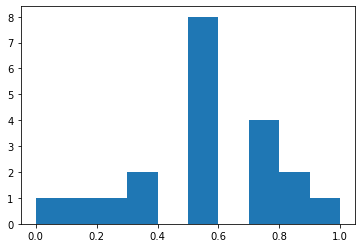

In [189]:
plt.hist(recall_score(y_test, pipeline.predict(X_test), average=None))

(array([0.05, 0.1 , 0.15, 0.25, 0.25, 0.65, 0.65, 0.85, 0.95, 1.  ]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

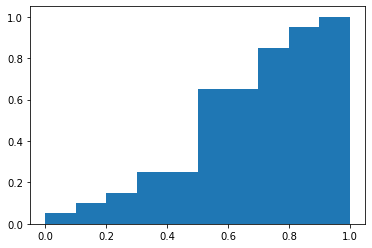

In [190]:
plt.hist(recall_score(y_test, pipeline.predict(X_test), average=None), cumulative=True, density=True)

In [191]:
recall_score(y_test, pipeline.predict(X_test), average='macro')

0.5581766114002956

In [201]:
test_set = pd.read_excel('test_set.xlsx')

In [202]:
final_prediction = pd.DataFrame(X_test.copy())

In [203]:
test_set['Prediction'] = pipeline.predict(test_set['Production Description Test'])

In [204]:
test_set.head(20)

,Production Description Test,Prediction
0,Hansaplast Strips Sort 1St,7
1,Einwegmasken 31g 50er Pg 1St,14
2,Disposable masks 3lg 50s Pg 1st,4
3,FFP2 Mask (Ts) 1St,4
4,Shell Face Mask 1st,4
5,Disposable masks 3lg 50s Pg 1st,4
6,Mouth Nose Cloth 1St,4
7,Mouth nose guard disposable 10er Py Int. 10st,4
8,Mouth Nose Cloth 1St,4
9,mouthNoseTuch Washable 1st,7


In [205]:
test_set.replace({'Prediction': code_dictionary}, inplace=True)

In [206]:
test_set.head()

,Production Description Test,Prediction
0,Hansaplast Strips Sort 1St,Health Care - Wound Care
1,Einwegmasken 31g 50er Pg 1St,Personal Care - Feminine Hygience
2,Disposable masks 3lg 50s Pg 1st,Health Care - Other Health Care
3,FFP2 Mask (Ts) 1St,Health Care - Other Health Care
4,Shell Face Mask 1st,Health Care - Other Health Care


In [207]:
test_set = test_set.join(test_set['Prediction'].str.split('-', expand=True).rename(columns={0:'IPH Category', 1: 'IPH Sub Category'}))

In [208]:
test_set.head(20)

,Production Description Test,Prediction,IPH Category,IPH Sub Category
0,Hansaplast Strips Sort 1St,Health Care - Wound Care,Health Care,Wound Care
1,Einwegmasken 31g 50er Pg 1St,Personal Care - Feminine Hygience,Personal Care,Feminine Hygience
2,Disposable masks 3lg 50s Pg 1st,Health Care - Other Health Care,Health Care,Other Health Care
3,FFP2 Mask (Ts) 1St,Health Care - Other Health Care,Health Care,Other Health Care
4,Shell Face Mask 1st,Health Care - Other Health Care,Health Care,Other Health Care
5,Disposable masks 3lg 50s Pg 1st,Health Care - Other Health Care,Health Care,Other Health Care
6,Mouth Nose Cloth 1St,Health Care - Other Health Care,Health Care,Other Health Care
7,Mouth nose guard disposable 10er Py Int. 10st,Health Care - Other Health Care,Health Care,Other Health Care
8,Mouth Nose Cloth 1St,Health Care - Other Health Care,Health Care,Other Health Care
9,mouthNoseTuch Washable 1st,Health Care - Wound Care,Health Care,Wound Care


In [209]:
test_set.to_csv('iphpredictions.csv')